In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
import datetime
import math

In [2]:
#!ls "/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/data"

In [3]:
def show_dataframe_info(df):
    print(df.shape)
    print(list(df.columns.values))
    print('\n dataframe info: \n', df.info())
    print('\n dataframe column datatypes:\n', df.dtypes)
    
def calculate_rmse(actual_values,predictions):
    mse= mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    return rmse

In [4]:
#airquality_data = pd.read_csv('/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/experiments/data/AirQuality/AirQo/Bugolobi(ambrosoli)/bugolobi.csv')

root_data_dir = 'data'
base_dir ='data\AirQuality\AirQo'

#airquality_data = pd.read_csv(os.path.join(base_dir,'Makerere','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Makerere','SelectedFeatures')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bugolobi(ambrosoli)','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Bugolobi(ambrosoli)','SelectedFeatures')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Mulago','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath= os.path.join(base_dir,'Mulago','SelectedFeatures')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Makindye','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir, 'Makindye','SelectedFeatures')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bukoto(kisu)','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath= os.path.join(base_dir,'Bukoto(kisu)', 'SelectedFeatures')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Lubowa','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Lubowa','SelectedFeatures')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Jinja_Road(NEMAHOUSE)','merged_hourly_airquality_greenness_meteorological_dataset.csv '))
#filepath = os.path.join(base_dir,'Jinja_Road(NEMAHOUSE)','SelectedFeatures')
#sensor_type = 1

#airquality_data = pd.read_csv(os.path.join(base_dir,'Rubaga_Kabusu','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Rubaga_Kabusu','SelectedFeatures')
#sensor_type = 1

#airquality_data = pd.read_csv(os.path.join(base_dir,'Kireka','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Kireka','SelectedFeatures')
#sensor_type = 1

#airquality_data = pd.read_csv(os.path.join(base_dir, 'Nsambya(American_Embassy)','merged_hourly_airquality_greenness_meteorological_dataset.csv '))
#filepath = os.path.join(base_dir, 'Nsambya(American_Embassy)','SelectedFeatures')
#sensor_type = 2

airquality_data.head(10)

,TimeStamp,PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
0,2019-02-15 13:00:00,46.06,57.10,13,0.1827,0.3439,45,0.00,87.76,559.43,30.97,3.53,0,0,0,0,0,1,0,0
1,2019-02-15 14:00:00,28.52,32.02,14,0.1827,0.3439,44,0.00,87.65,596.12,31.20,3.19,0,0,0,0,0,1,0,0
2,2019-02-15 15:00:00,28.72,32.25,15,0.1827,0.3439,46,0.17,87.64,329.22,28.48,1.50,1,0,0,0,0,0,0,0
3,2019-02-15 16:00:00,30.42,34.35,16,0.1827,0.3439,78,1.82,87.69,68.90,21.04,1.20,0,0,1,0,0,0,0,0
4,2019-02-15 17:00:00,32.23,36.47,17,0.1827,0.3439,77,0.00,87.63,91.85,22.00,0.66,0,1,0,0,0,0,0,0
5,2019-02-15 18:00:00,38.57,44.14,18,0.1827,0.3439,70,0.00,87.64,44.65,22.98,0.44,0,0,1,0,0,0,0,0
6,2019-02-15 19:00:00,47.84,56.04,19,0.1827,0.3439,60,0.00,87.69,2.10,23.42,1.22,0,0,1,0,0,0,0,0
7,2019-02-15 20:00:00,49.48,58.38,20,0.1827,0.3439,60,0.00,87.70,0.00,22.84,1.24,0,0,1,0,0,0,0,0
8,2019-02-15 21:00:00,48.89,57.49,21,0.1827,0.3439,64,0.00,87.76,0.00,22.24,1.48,0,0,1,0,0,0,0,0
9,2019-02-15 22:00:00,46.33,53.82,22,0.1827,0.3439,66,0.00,87.82,0.00,22.59,1.69,0,0,1,0,0,0,0,0


In [5]:
airquality_data_copy = airquality_data.copy()
airquality_data["TimeStamp"] = pd.to_datetime(airquality_data["TimeStamp"])
airquality_data = airquality_data.set_index('TimeStamp')

In [6]:
if sensor_type == 0:
    airquality_data_for_selected_features = airquality_data.drop(['hour', 'EVI', 'NDVI',
       'humidity (%)', 'precipitation (mm)', 'pressure (kPa)',
       'radiation (W/m2)', 'windspeed (m/s)',
       'winddirection_E', 'winddirection_N', 'winddirection_NE',
       'winddirection_NW', 'winddirection_S', 'winddirection_SE',
       'winddirection_SW', 'winddirection_W','temperature (oC)','PM1(Ug/m3)','PM10(Ug/m3)'], axis=1)
    
elif sensor_type == 1:
    airquality_data_for_selected_features = airquality_data.drop(['hour', 'EVI', 'NDVI',
       'humidity (%)', 'precipitation (mm)', 'pressure (kPa)',
       'radiation (W/m2)', 'windspeed (m/s)',
       'winddirection_E', 'winddirection_N', 'winddirection_NE',
       'winddirection_NW', 'winddirection_S', 'winddirection_SE',
       'winddirection_SW', 'winddirection_W','temperature (oC)','PM10(Ug/m3)'], axis=1)
    
elif sensor_type == 2:
    airquality_data_for_selected_features = airquality_data.drop(['hour', 'EVI', 'NDVI',
       'humidity (%)', 'precipitation (mm)', 'pressure (kPa)',
       'radiation (W/m2)', 'windspeed (m/s)',
       'winddirection_E', 'winddirection_N', 'winddirection_NE',
       'winddirection_NW', 'winddirection_S', 'winddirection_SE',
       'winddirection_SW', 'winddirection_W','temperature (oC)'], axis=1)
    
#temperature

In [7]:
airquality_data_for_selected_features.head()

,PM2.5(Ug/m3)
TimeStamp,
2019-02-15 13:00:00,46.06
2019-02-15 14:00:00,28.52
2019-02-15 15:00:00,28.72
2019-02-15 16:00:00,30.42
2019-02-15 17:00:00,32.23


In [8]:
airquality_data_for_selected_features.tail()

,PM2.5(Ug/m3)
TimeStamp,
2019-05-31 19:00:00,55.82
2019-05-31 20:00:00,43.76
2019-05-31 21:00:00,45.88
2019-05-31 22:00:00,63.32
2019-05-31 23:00:00,65.94


In [9]:
show_dataframe_info(airquality_data_for_selected_features)

(2531, 1)
['PM2.5(Ug/m3)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2531 entries, 2019-02-15 13:00:00 to 2019-05-31 23:00:00
Data columns (total 1 columns):
PM2.5(Ug/m3)    2531 non-null float64
dtypes: float64(1)
memory usage: 39.5 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM2.5(Ug/m3)    float64
dtype: object


In [10]:
airquality_data_for_selected_features.describe()

,PM2.5(Ug/m3)
count,2531.000000
mean,43.018933
std,22.738238
min,2.300000
25%,29.620000
50%,39.520000
75%,48.950000
max,201.110000


### Separate Features From the Target

In [11]:
airquality_data_for_selected_features.columns

Index(['PM2.5(Ug/m3)'], dtype='object')

In [12]:
airquality_data_for_selected_features = airquality_data_for_selected_features.values


### separate test dataset from training dataset and validation dataset
- separate data on 70/10/20 training/validation/testing


In [13]:
training_data_length = math.floor(len(airquality_data_for_selected_features)* 0.7)
print(training_data_length)

validation_data_length = math.floor(len(airquality_data_for_selected_features)*0.1)
print(validation_data_length)

testing_data_length = math.floor(len(airquality_data_for_selected_features)* 0.2)
print(testing_data_length)

print(str(training_data_length + validation_data_length + testing_data_length ))

1771
253
506
2530


In [14]:
training_data = airquality_data_for_selected_features[0:training_data_length,:]
print(training_data.shape)

validation_data = airquality_data_for_selected_features[training_data_length:training_data_length+validation_data_length,:]
print(validation_data.shape)

testing_data = airquality_data_for_selected_features[training_data_length+validation_data_length: training_data_length+validation_data_length+testing_data_length,:]
print(testing_data.shape)


(1771, 1)
(253, 1)
(506, 1)


### Preprocess the data to a format a neural network can ingest.
- Normalising/Scaling data using minmax scaler in sklearn preprocessing for each dataset separately
- Generationg sequential data from the recent past (e.g 3hrs), along with a target pm2.5 value in the future (next day)  for the
  * training dataset
  * validation dataset
  * test dataset

In [15]:
def generate_dataset_in_format_lstm_can_ingest(data, look_back=1):
    x_data, y_data = [], []
    for i in range(len(data)-look_back-1):
        feature_data = data[i:(i+look_back), 0]
        x_data.append(feature_data)
        y_data.append(data[i + look_back, 0])
    return np.array(x_data), np.array(y_data)

In [16]:
def generate_multivariate_dataset_in_format_lstm_can_ingest(data, number_of_inputs, number_of_outputs, dropnan=True):
    number_of_variables = 1 if type(data) is list else data.shape[1]
    data_frame= pd.DataFrame(data)
    columnsx, names = list(),list()
    #generate input sequence (t-n, ... t-1)
    for i in range(number_of_inputs, 0, -1):
        columnsx.append(data_frame.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(number_of_variables)]
       # forecast sequence (t, t+1, ... t+n)
    for i in range(0, number_of_outputs):
        columnsx.append(data_frame.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(number_of_variables)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(number_of_variables)]
            
    aggregated_df = pd.concat(columnsx, axis=1)
    aggregated_df.columns = names
    
    if dropnan:
        aggregated_df.dropna(inplace=True)
    return aggregated_df
    

### given data that goes back a number of timesteps e.g 3hrs, can we predict the next hour.

### training dataset

In [17]:
scaler = MinMaxScaler()
scaled_training_data = scaler.fit_transform(training_data)
# reshape into X=t and Y=t+1 timesteps = lookback
timesteps = 1
number_of_features = 1
scaled_training_features, training_targets = generate_dataset_in_format_lstm_can_ingest(scaled_training_data, timesteps)
# reshape input to [samples, time steps, features]

scaled_training_features_with_original_shape = scaled_training_features
scaled_training_features = np.reshape(scaled_training_features, 
                                      (scaled_training_features.shape[0], timesteps, scaled_training_features.shape[1]))


### validation dataset

In [18]:
scaled_validation_data = scaler.fit_transform(validation_data)
#print(scaled_validation_data)

scaled_validation_features, validation_targets = generate_dataset_in_format_lstm_can_ingest(scaled_validation_data, timesteps)
# reshape input to [samples, time steps, features]
scaled_validation_features = np.reshape(scaled_validation_features, (scaled_validation_features.shape[0], 
                                                                     timesteps, scaled_validation_features.shape[1]))

### Testing dataset

In [19]:
scaled_testing_data = scaler.fit_transform(testing_data)
scaled_testing_features, testing_targets = generate_dataset_in_format_lstm_can_ingest(scaled_testing_data, timesteps)
scaled_testing_features_with_original_shape = scaled_testing_features
scaled_testing_features = np.reshape(scaled_testing_features, (scaled_testing_features.shape[0], 
                                                                     timesteps, scaled_testing_features.shape[1]))

In [20]:
testing_data[0:2]

array([[33.93],
       [40.13]])

In [23]:
testing_targets[0:2]

array([0.26101296, 0.27726737])

### SUPPORT VECTOR REGRESSION APPROACH
- Training and evaluation on support vector regression approach

In [24]:
scaled_training_features.shape

(1769, 1, 1)

In [25]:
training_targets.shape

(1769,)

In [26]:
scaled_training_features_with_original_shape.shape

(1769, 1)

In [27]:
testing_targets.shape

(504,)

In [28]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', degree=3, C=100, epsilon=0.1)
# fit the model by fitting the SVM regressor to the training data
svr.fit(scaled_training_features_with_original_shape, training_targets.ravel())
svr_predictions = svr.predict(scaled_testing_features_with_original_shape)
print(svr_predictions)

[0.22881488 0.27297846 0.28741074 0.28574658 0.22715362 0.16151283
 0.23400597 0.22259609 0.26615671 0.3687575  0.30090625 0.25724328
 0.38360555 0.25901635 0.28657897 0.25674643 0.21243297 0.18603704
 0.22816499 0.20302925 0.22303058 0.16527648 0.19088039 0.24934493
 0.30853834 0.30186352 0.23162851 0.11028448 0.12321767 0.27738944
 0.04921864 0.09612006 0.11597313 0.11597313 0.13653048 0.20251798
 0.26128264 0.23731481 0.14577489 0.12166494 0.09774126 0.15575275
 0.22881488 0.17124908 0.18324544 0.1618081  0.21585007 0.21781075
 0.22758713 0.19827815 0.19293302 0.18184886 0.16999612 0.04921864
 0.09472037 0.04263105 0.08714025 0.16542403 0.35693039 0.32854086
 0.27913541 0.31165539 0.19622909 0.17559511 0.25553908 0.30717987
 0.23335788 0.27108325 0.2221615  0.24212302 0.27731955 0.26566304
 0.26107033 0.25922897 0.20930234 0.2051463  0.17463785 0.10150146
 0.25297907 0.1624724  0.20529224 0.30833469 0.42431591 0.42088723
 0.19263987 0.18911996 0.12462265 0.12972565 0.16999612 0.1576

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [29]:
svr_predictions = svr_predictions.reshape(-1, 1)
svr_predictions.shape

(504, 1)

In [30]:
scaled_testing_targets = testing_targets.reshape(-1,1)
scaled_testing_targets.shape

(504, 1)

In [31]:
scaled_testing_targets.shape

(504, 1)

In [32]:
scaled_testing_features_with_original_shape.shape

(504, 1)

### inverting the predictions and actual values from standardized form

In [33]:
testing_targets_unscaled = scaler.inverse_transform(scaled_testing_targets)
svr_testing_predictions_unscaled = scaler.inverse_transform(svr_predictions)

In [34]:
### changing shape of the arrays to those that can be used in creating dataframes

In [35]:
svr_testing_predictions_unscaled = scaler.inverse_transform(svr_predictions)


svr_mae = mean_absolute_error(testing_targets_unscaled, svr_testing_predictions_unscaled)
print('SVR MAE: ', svr_mae.round(2))
svr_rmse = calculate_rmse(testing_targets_unscaled, svr_testing_predictions_unscaled)
print('SVR RMSE: ', svr_rmse.round(2))
svr_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': testing_targets_unscaled.ravel(), 'Predicted PM2.5':svr_testing_predictions_unscaled.ravel()}) 
svr_prediction_vs_actual_dataframe

## save predictions by svr
svr_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'svr_predictions.csv'))

SVR MAE:  8.44
SVR RMSE:  11.42


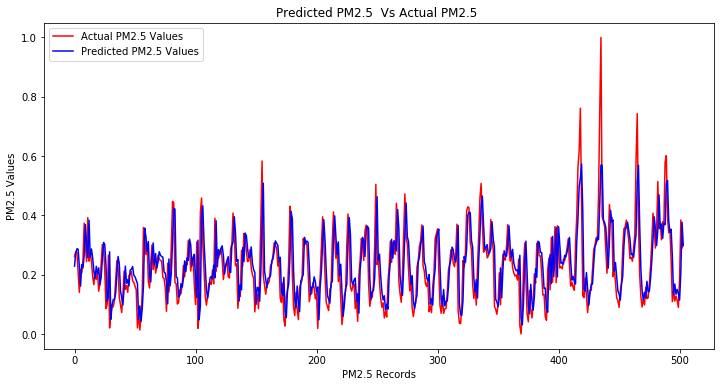

In [36]:
fig_svr_predictions_vs_actual = plt.figure(figsize=(12,6))
ax_fig_svr_predictions_vs_actual = fig_svr_predictions_vs_actual.add_subplot(111)
plt.plot(testing_targets, color = 'red', label = 'Actual PM2.5 Values')
plt.plot(svr_predictions, color = 'blue', label = 'Predicted PM2.5 Values')
plt.title('Predicted PM2.5  Vs Actual PM2.5 ')
plt.xlabel('PM2.5 Records')
plt.ylabel('PM2.5 Values')
plt.legend()

fig_svr_predictions_vs_actual.savefig(os.path.join(filepath, 'svr_model_prediction_vs_actual.png'))

### BASIC LSTM MODOEL
- Training and evaluating on basic lstm model with one layer

In [37]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.models import load_model

def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true)))

def root_mean_squared_error(y_true, y_pred):
        return backend.sqrt(backend.mean(backend.square(y_pred - y_true)))

model = Sequential()
model.add(LSTM(8, input_shape = (scaled_training_features.shape[1], number_of_features)))
model.add(Dense(1))

callbacks_list = [
    EarlyStopping(  # interrupts training when improvement stops 
        monitor='val_loss', 
        patience=10, 
        mode='min'), 
    
   ModelCheckpoint( #saves the current weights after every epock
        filepath=os.path.join(filepath, 'basic_lstm_model.h5'),
        monitor='val_loss',save_best_only=True) # these 2 arguments mean , you won't overwrite the model file unless val_loss has improved which  allows you to keep the best model seen during training.
]

model.compile(optimizer='adam', loss='mse', metrics = ['mean_absolute_error', rmse])
basic_model_history = model.fit(scaled_training_features, training_targets, epochs=50,
                                validation_data=(scaled_validation_features, validation_targets),
                               callbacks=callbacks_list)

Train on 1769 samples, validate on 251 samples
Epoch 1/50
1769/1769 [==============================] - 2s 874us/step - loss: 0.0359 - mean_absolute_error: 0.1500 - rmse: 0.1855 - val_loss: 0.0385 - val_mean_absolute_error: 0.1454 - val_rmse: 0.1831
Epoch 2/50
1769/1769 [==============================] - 0s 119us/step - loss: 0.0141 - mean_absolute_error: 0.0746 - rmse: 0.1131 - val_loss: 0.0215 - val_mean_absolute_error: 0.0974 - val_rmse: 0.1344
Epoch 3/50
1769/1769 [==============================] - 0s 112us/step - loss: 0.0105 - mean_absolute_error: 0.0675 - rmse: 0.0986 - val_loss: 0.0182 - val_mean_absolute_error: 0.0897 - val_rmse: 0.1247
Epoch 4/50
1769/1769 [==============================] - 0s 109us/step - loss: 0.0098 - mean_absolute_error: 0.0659 - rmse: 0.0951 - val_loss: 0.0173 - val_mean_absolute_error: 0.0874 - val_rmse: 0.1217
Epoch 5/50
1769/1769 [==============================] - 0s 118us/step - loss: 0.0091 - mean_absolute_error: 0.0642 - rmse: 0.0927 - val_loss: 0.0

1769/1769 [==============================] - 0s 93us/step - loss: 0.0055 - mean_absolute_error: 0.0458 - rmse: 0.0710 - val_loss: 0.0112 - val_mean_absolute_error: 0.0693 - val_rmse: 0.1008
Epoch 42/50
1769/1769 [==============================] - 0s 102us/step - loss: 0.0055 - mean_absolute_error: 0.0465 - rmse: 0.0710 - val_loss: 0.0113 - val_mean_absolute_error: 0.0696 - val_rmse: 0.1012
Epoch 43/50
1769/1769 [==============================] - 0s 158us/step - loss: 0.0055 - mean_absolute_error: 0.0460 - rmse: 0.0710 - val_loss: 0.0112 - val_mean_absolute_error: 0.0692 - val_rmse: 0.1008
Epoch 44/50
1769/1769 [==============================] - 0s 145us/step - loss: 0.0055 - mean_absolute_error: 0.0457 - rmse: 0.0712 - val_loss: 0.0111 - val_mean_absolute_error: 0.0691 - val_rmse: 0.1004
Epoch 45/50
1769/1769 [==============================] - 0s 163us/step - loss: 0.0055 - mean_absolute_error: 0.0461 - rmse: 0.0711 - val_loss: 0.0112 - val_mean_absolute_error: 0.0692 - val_rmse: 0.100

In [38]:
scaled_training_features.shape[1]

1

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 320       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [40]:
basic_model_architecture_path = os.path.join(filepath, 'basic_model_plot.png')
plot_model(model, to_file=basic_model_architecture_path, show_shapes=False, show_layer_names=False)

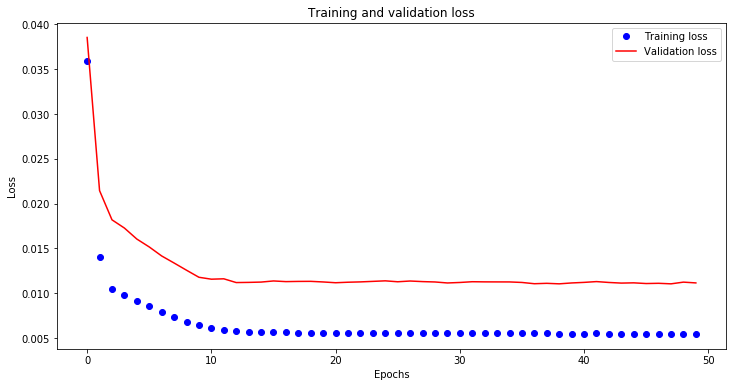

In [41]:
loss = basic_model_history.history['loss']
val_loss = basic_model_history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

fig.savefig(os.path.join(filepath, 'basic_model_history_training_validation_loss.png'))

In [42]:
print(np.argmin(val_loss))
#val_loss[70]

47


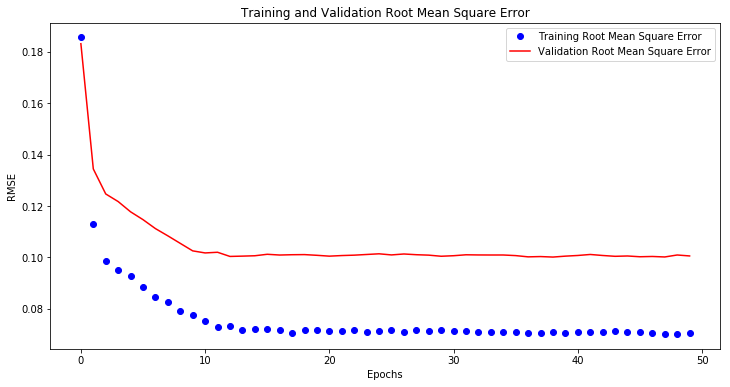

In [43]:
hist_rmse = basic_model_history.history['rmse']
val_rmse = basic_model_history.history['val_rmse']
epochs = range(len(hist_rmse))

fig_rmse = plt.figure(figsize=(12,6))
ax_rmse= fig_rmse.add_subplot(111)

plt.plot(epochs, hist_rmse, 'bo', label='Training Root Mean Square Error')
plt.plot(epochs, val_rmse, 'r', label='Validation Root Mean Square Error')
plt.title('Training and Validation Root Mean Square Error')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.show()
fig_rmse.savefig(os.path.join(filepath, 'basic_model_history_training_validation_RMSE.png'))

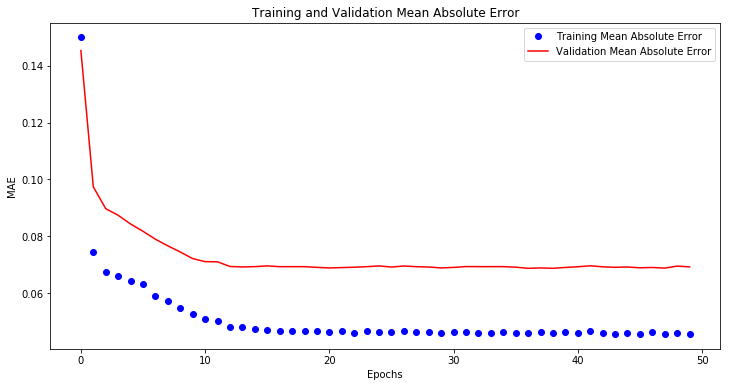

In [44]:
mae = basic_model_history.history['mean_absolute_error']
val_mae = basic_model_history.history['val_mean_absolute_error']
epochs = range(len(mae))

fig_mae = plt.figure(figsize=(12,6))
ax_mae = fig_mae.add_subplot(111)

plt.plot(epochs, mae, 'bo', label='Training Mean Absolute Error')
plt.plot(epochs, val_mae, 'r', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()
fig_mae.savefig(os.path.join(filepath, 'basic_model_history_training_validation_mae.png'))

In [45]:
saved_model = load_model(os.path.join(filepath,'basic_lstm_model.h5'),  custom_objects={'rmse': rmse})

basic_lstm_model_train_evaluation = saved_model.evaluate(scaled_training_features, training_targets, verbose=0)
basic_lstm_model_test_evaluation = saved_model.evaluate(scaled_testing_features, testing_targets, verbose=0)
print(basic_lstm_model_train_evaluation)
print(basic_lstm_model_test_evaluation)

[0.005470385742723866, 0.046980578285984696, 0.06692708396116444]
[0.007998718451412897, 0.0648615291667363, 0.08704228604596759]


In [46]:
basic_lstm_model_predictions = saved_model.predict(scaled_testing_features)
basic_lstm_model_evaluation =  saved_model.evaluate(scaled_training_features, training_targets)
print(basic_lstm_model_evaluation)
print(saved_model.metrics_names)

1769/1769 [==============================] - 0s 27us/step
[0.005470385742723866, 0.046980578285984696, 0.06692708396116444]
['loss', 'mean_absolute_error', 'rmse']


In [47]:
### converting targets and predictions to from scaled values

In [48]:
basic_lstm_testing_targets_unscaled = scaler.inverse_transform(scaled_testing_targets)
basic_lstm_testing_predictions_unscaled = scaler.inverse_transform(basic_lstm_model_predictions)

In [49]:
basic_lstm_rmse = calculate_rmse(basic_lstm_testing_targets_unscaled, basic_lstm_testing_predictions_unscaled)
basic_lstm_mae =  mean_absolute_error(basic_lstm_testing_targets_unscaled, basic_lstm_testing_predictions_unscaled)
print('BASIC LSTM RMSE: ', basic_lstm_rmse.round(2))
print('BASIC LSTM MAE: ', basic_lstm_mae.round(2))

BASIC LSTM RMSE:  11.39
BASIC LSTM MAE:  8.26


In [50]:
print(basic_lstm_model_predictions.shape)
print(basic_lstm_model_predictions.ravel().shape)

(504, 1)
(504,)


In [51]:
basic_lstm_model_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': basic_lstm_testing_targets_unscaled.ravel(), 'Predicted PM2.5':basic_lstm_testing_predictions_unscaled.ravel()}) 
basic_lstm_model_prediction_vs_actual_dataframe
## save predictions by basic lstm model
basic_lstm_model_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'basic_lstm_model_predictions.csv'))

### Creation of Neural Network Architecture,Training & Evaluation  on Stacked LSTM and DROPOUT layers

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import plot_model

deep_lstm_callbacks_list = [
    EarlyStopping(  # interrupts training when improvement stops 
        monitor='val_loss', 
        patience=10, 
        mode='min'), 
    
   ModelCheckpoint( #saves the current weights after every epock
        filepath=os.path.join(filepath, 'deep_lstm_best_model.h5'),
        monitor='val_loss',save_best_only=True) # these 2 arguments mean , you won't overwrite the model file unless val_loss has improved which  allows you to keep the best model seen during training.
]

regressor_model = Sequential()
regressor_model.add(LSTM(units=8, return_sequences = True, input_shape = (scaled_training_features.shape[1],number_of_features)))
regressor_model.add(Dropout(0.2))
number_of_features
regressor_model.add(LSTM(units = 4, return_sequences = True))
regressor_model.add(Dropout(0.1))
regressor_model.add(LSTM(units = 4))
#regressor_model.add(Dropout(0.2))

regressor_model.add(Dense(units = 1))

regressor_model.compile(optimizer = 'adam', loss = 'mse',metrics = ['mean_absolute_error',rmse] )

##Training the model
history = regressor_model.fit(scaled_training_features, training_targets,epochs = 100,
                              validation_data=(scaled_validation_features, validation_targets), batch_size=32,
                              callbacks=deep_lstm_callbacks_list)


Train on 1769 samples, validate on 251 samples
Epoch 1/100
1769/1769 [==============================] - 5s 3ms/step - loss: 0.0456 - mean_absolute_error: 0.1733 - rmse: 0.2102 - val_loss: 0.0563 - val_mean_absolute_error: 0.1837 - val_rmse: 0.2228
Epoch 2/100
1769/1769 [==============================] - 0s 226us/step - loss: 0.0213 - mean_absolute_error: 0.0951 - rmse: 0.1410 - val_loss: 0.0304 - val_mean_absolute_error: 0.1173 - val_rmse: 0.1584
Epoch 3/100
1769/1769 [==============================] - 0s 215us/step - loss: 0.0142 - mean_absolute_error: 0.0784 - rmse: 0.1143 - val_loss: 0.0251 - val_mean_absolute_error: 0.1052 - val_rmse: 0.1448
Epoch 4/100
1769/1769 [==============================] - 0s 217us/step - loss: 0.0137 - mean_absolute_error: 0.0789 - rmse: 0.1133 - val_loss: 0.0238 - val_mean_absolute_error: 0.1025 - val_rmse: 0.1415
Epoch 5/100
1769/1769 [==============================] - 0s 240us/step - loss: 0.0132 - mean_absolute_error: 0.0780 - rmse: 0.1120 - val_loss: 

Epoch 41/100
1769/1769 [==============================] - 0s 210us/step - loss: 0.0057 - mean_absolute_error: 0.0471 - rmse: 0.0723 - val_loss: 0.0111 - val_mean_absolute_error: 0.0696 - val_rmse: 0.1000


In [53]:
#regressor_model.save('/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/experiments/data/AirQuality/AirQo/airquality_prediction_bugolobi_04_20_2019.h5')

regressor_model.save(os.path.join(filepath,'airquality_prediction_model.h5'))
regressor_model.summary()
regressor_model_architecture_path = os.path.join(filepath, 'deep_lstm_model_plot.png')
plot_model(regressor_model, to_file=regressor_model_architecture_path, show_shapes=False, show_layer_names=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 8)              320       
_________________________________________________________________
dropout (Dropout)            (None, 1, 8)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 4)              208       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 4)              0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 4)                 144       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 677
Trainable params: 677
Non-trainable params: 0
_________________________________________________________________


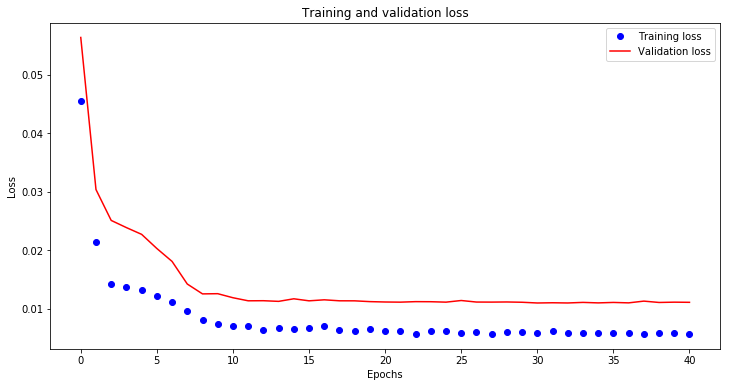

In [54]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig_deep_lstm_loss= plt.figure(figsize=(12,6))
ax = fig_deep_lstm_loss.add_subplot(111)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

fig_deep_lstm_loss.savefig(os.path.join(filepath, 'deep_lstm_model_history_training_validation_loss.png'))

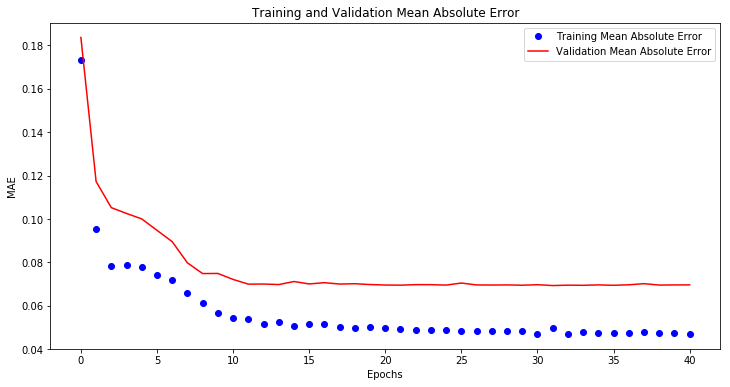

In [55]:
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range(len(mae))

fig_deep_lstm_mae = plt.figure(figsize=(12,6))
ax_mae = fig_deep_lstm_mae.add_subplot(111)

plt.plot(epochs, mae, 'bo', label='Training Mean Absolute Error')
plt.plot(epochs, val_mae, 'r', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()
fig_mae.savefig(os.path.join(filepath, 'deep_lst_mmodel_history_training_validation_mae.png'))

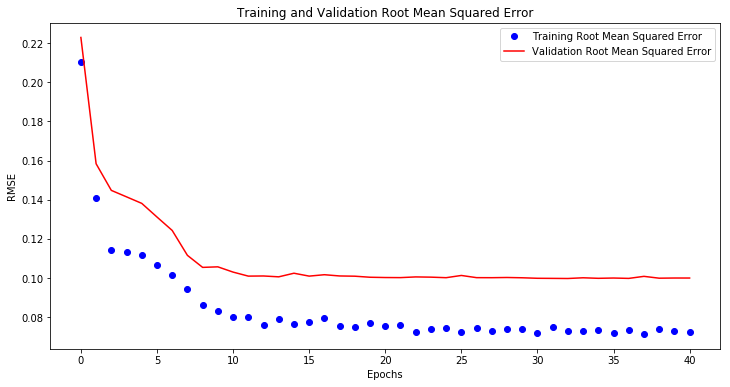

In [56]:
hist_rmse = history.history['rmse']
val_rmse = history.history['val_rmse']
epochs = range(len(hist_rmse))

fig_rmse = plt.figure(figsize=(12,6))
ax_rmse= fig_rmse.add_subplot(111)

plt.plot(epochs, hist_rmse, 'bo', label='Training Root Mean Squared Error')
plt.plot(epochs, val_rmse, 'r', label='Validation Root Mean Squared Error')
plt.title('Training and Validation Root Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.show()
fig_rmse.savefig(os.path.join(filepath, 'deep_model_history_training_validation_RMSE.png'))

### Making predictions (forecasts) using the deep recurrent lstm
1. Convert test set in the same format accepted by model
1. make the forecasts directly on the testing dataset

### Make prediction and evaluation using the developed deep lstm model

In [57]:
from tensorflow.keras.models import load_model
#saved_best_deep_lstm_model = load_model(os.path.join(filepath,'deep_lstm_best_model.h5'),  custom_objects={'rmse': rmse})
saved_best_deep_lstm_model = load_model(os.path.join(filepath,'airquality_prediction_model.h5'),  custom_objects={'rmse': rmse})
deep_lstm_model_train_evaluation = saved_best_deep_lstm_model.evaluate(scaled_training_features, training_targets, verbose=0)
deep_lstm_model_test_evaluation = saved_best_deep_lstm_model.evaluate(scaled_testing_features, testing_targets, verbose=0)
print(deep_lstm_model_train_evaluation)
print(deep_lstm_model_test_evaluation)

[0.005283401394025999, 0.04607417389177683, 0.06608209289387164]
[0.007837922947983893, 0.06459375258002963, 0.08661388594006734]


In [58]:
deep_lstm_model_predictions = saved_best_deep_lstm_model.predict(scaled_testing_features)
deep_lstm_model_evaluation =  saved_best_deep_lstm_model.evaluate(scaled_testing_features, testing_targets)


deep_lstm_testing_targets_unscaled = scaler.inverse_transform(scaled_testing_targets)
deep_lstm_testing_predictions_unscaled = scaler.inverse_transform(deep_lstm_model_predictions)

deep_lstm_rmse = calculate_rmse(deep_lstm_testing_targets_unscaled, deep_lstm_testing_predictions_unscaled )
deep_lstm_mae =  mean_absolute_error(deep_lstm_testing_targets_unscaled, deep_lstm_testing_predictions_unscaled )
print('Deep LSTM RMSE: ', deep_lstm_rmse.round(2))
print('Deep LSTM MAE: ', deep_lstm_mae.round(2))

deep_lstm_model_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': deep_lstm_testing_targets_unscaled.ravel(), 'Predicted PM2.5':deep_lstm_model_predictions.ravel()}) 
deep_lstm_model_prediction_vs_actual_dataframe
## save predictions by basic lstm model
deep_lstm_model_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'deep_lstm_model_predictions.csv'))

504/504 [==============================] - 0s 40us/step
Deep LSTM RMSE:  11.27
Deep LSTM MAE:  8.23


### Verification of the average in the results of the forecasts and in the actual results

In [59]:
print('predictions', deep_lstm_testing_predictions_unscaled.mean())
print('actual pm2.5 values', deep_lstm_testing_targets_unscaled.mean())

predictions 36.04389
actual pm2.5 values 35.73511904761905


### Visualization of the predictions and actual values of PM2.5
1. #### using line graph

In [60]:
testing_data_for_plotting =airquality_data_copy.loc[training_data_length+validation_data_length+timesteps+2: training_data_length+validation_data_length+testing_data_length,:]
print(testing_data_for_plotting.shape)
print(testing_targets.shape)
print()

(504, 20)
(504,)



In [61]:
testing_data_for_plotting.head(2)

,TimeStamp,PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
2027,2019-05-11 00:00:00,41.96,49.60,0,0.2623,0.4497,89,0.0,87.65,0.0,22.39,0.30,0,0,0,0,0,0,0,1
2028,2019-05-11 01:00:00,33.70,37.87,1,0.2623,0.4497,89,0.0,87.64,0.0,22.62,0.25,0,0,0,0,1,0,0,0


In [62]:
print(deep_lstm_testing_targets_unscaled.shape)
print(deep_lstm_testing_targets_unscaled[0:3])
print(deep_lstm_testing_predictions_unscaled.shape)
print(deep_lstm_testing_predictions_unscaled[0:3])

(504, 1)
[[40.13]
 [42.2 ]
 [41.96]]
(504, 1)
[[34.272007]
 [39.71137 ]
 [41.556778]]


In [63]:
actual_pm25_vs_predicted_pm25_dataframe = pd.DataFrame({'TimeStamp':testing_data_for_plotting['TimeStamp'].values, 
                           'Actual PM2.5':testing_targets.ravel(), 'Predicted PM2.5': deep_lstm_model_predictions.ravel()})


actual_pm25_vs_predicted_pm25_dataframe["TimeStamp"] = pd.to_datetime(actual_pm25_vs_predicted_pm25_dataframe["TimeStamp"])
actual_pm25_vs_predicted_pm25_dataframe = actual_pm25_vs_predicted_pm25_dataframe.set_index('TimeStamp')
actual_pm25_vs_predicted_pm25_dataframe.head()

,Actual PM2.5,Predicted PM2.5
TimeStamp,,
2019-05-11 00:00:00,0.261013,0.215014
2019-05-11 01:00:00,0.277267,0.257726
2019-05-11 02:00:00,0.275383,0.272217
2019-05-11 03:00:00,0.210522,0.270534
2019-05-11 04:00:00,0.140086,0.213460


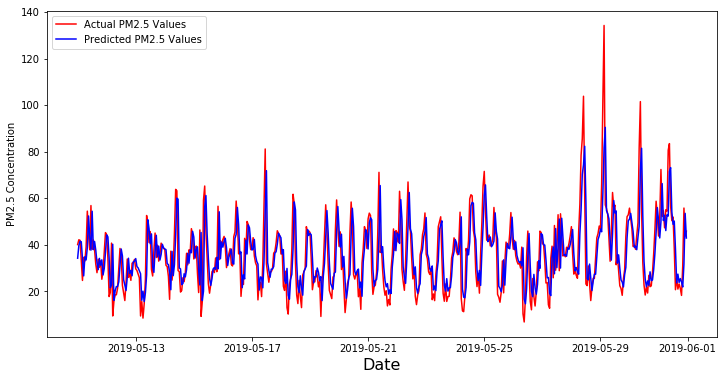

In [64]:
fig_deep_lstm_predictions_vs_actual_x = plt.figure(figsize=(12,6))
ax_fig_deep_lstm_predictions_vs_actual_x = fig_deep_lstm_predictions_vs_actual_x.add_subplot(111)
plt.plot(actual_pm25_vs_predicted_pm25_dataframe.index, deep_lstm_testing_targets_unscaled, color = 'red', label = 'Actual PM2.5 Values')
plt.plot(actual_pm25_vs_predicted_pm25_dataframe.index, deep_lstm_testing_predictions_unscaled, color = 'blue', label = 'Predicted PM2.5 Values')
#plt.title('PM2.5 Values Predictions Vs Actual PM2.5 Values ')
plt.xlabel('Date', fontsize=16)
plt.ylabel('PM2.5 Concentration')
plt.legend()


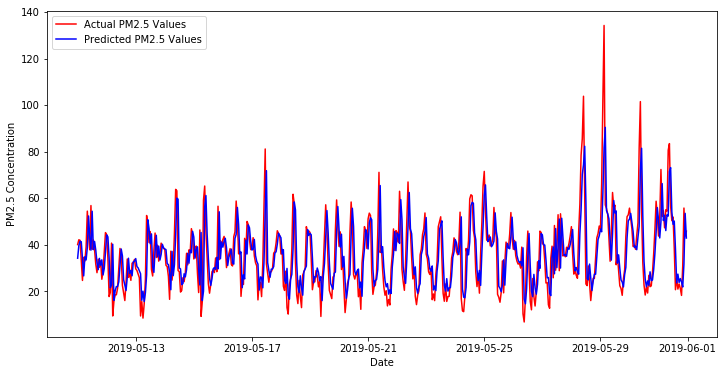

In [65]:
fig_deep_lstm_predictions_vs_actual = plt.figure(figsize=(12,6))
ax_fig_deep_lstm_predictions_vs_actual = fig_deep_lstm_predictions_vs_actual.add_subplot(111)
plt.plot(actual_pm25_vs_predicted_pm25_dataframe.index, deep_lstm_testing_targets_unscaled, color = 'red', label = 'Actual PM2.5 Values')
plt.plot(actual_pm25_vs_predicted_pm25_dataframe.index, deep_lstm_testing_predictions_unscaled, color = 'blue', label = 'Predicted PM2.5 Values')
#plt.title('PM2.5 Values Predictions Vs Actual PM2.5 Values ')
#ax_fig_deep_lstm_predictions_vs_actual.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.legend()

fig_deep_lstm_predictions_vs_actual.savefig(os.path.join(filepath, 'deep_lstm_model_prediction_vs_actual.png'))

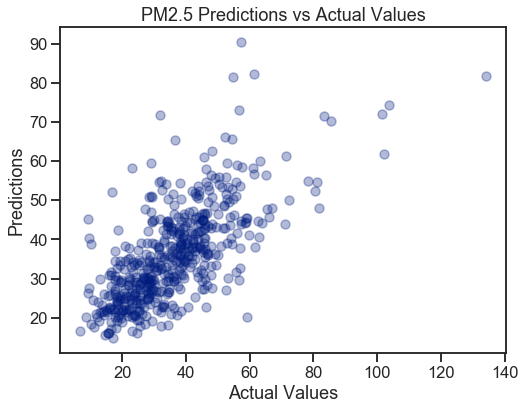

In [66]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
fig_deep_lstm_predictions_vs_actual_scatter = plt.figure(figsize=(8,6))
ax_fig_deep_lstm_predictions_vs_actual_scatter = fig_deep_lstm_predictions_vs_actual_scatter.add_subplot(111)
ax = ax_fig_deep_lstm_predictions_vs_actual_scatter
# we are going to use y_test, y_test_pred
ax.scatter(deep_lstm_testing_targets_unscaled, deep_lstm_testing_predictions_unscaled, alpha=.3)

ax.set(xlabel='Actual Values', 
       ylabel='Predictions',
       title='PM2.5 Predictions vs Actual Values');

fig_deep_lstm_predictions_vs_actual_scatter.savefig(os.path.join(filepath, 'deep_lstm_model_predictions_vs_actual_values_scatter.png'))

### saving results to file

In [67]:
with open(os.path.join(filepath, "results_summary.txt"), "w+") as text_file:
        print("SVR RMSE : {}\n SVR MAE : {} \n Basic LSTM RMSE: {} \n Basic LSTM MAE: {} \n Deep LSTM RMSE : {} \n Deep LSTM MAE: {} , \n metrics {}"
              .format(svr_rmse.round(2),svr_mae.round(2),  basic_lstm_rmse.round(2), basic_lstm_mae.round(2),
                      deep_lstm_rmse.round(2), deep_lstm_mae.round(2), model.metrics_names ), file=text_file)